## 560. 和为 K 的子数组

给你一个整数数组 nums 和一个整数 k ，请你统计并返回 该数组中和为 k 的子数组的个数 。
子数组是数组中元素的连续非空序列

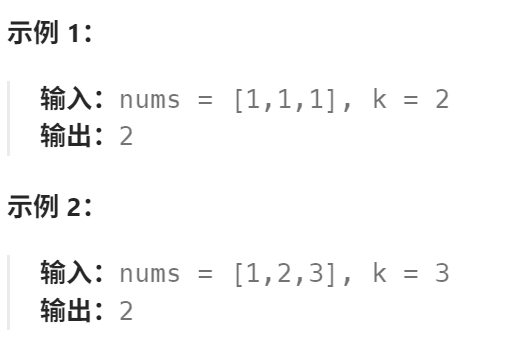


核心思路

该算法基于前缀和 + 哈希表。用 preSum 表示从数组起点到当前位置的累加和，若某一段连续子数组的和为 k，则必然存在两个前缀和满足
preSum[j] − preSum[i] = k。因此，在遍历数组时，只需统计此前出现过多少次值为 preSum − k 的前缀和，即可直接累加得到以当前位置结尾、和为 k 的子数组个数。哈希表用于记录每个前缀和出现的次数，从而将原本需要双重循环的问题转化为一次线性扫描。

In [9]:
class Solution:
    def subarraySum(self, nums, k):
        """
        统计和为k的连续子数组个数
        :param nums: 整数数组（可含正、负、0）
        :param k: 目标和
        :return: 满足条件的子数组个数
        """
        preSum = 0  # 记录当前前缀和，单变量累加无需数组
        ans = 0     # 最终答案，统计子数组个数
        # 哈希表：键=前缀和，值=该前缀和出现的次数；初始{0:1}处理preSum=k的情况
        prefix_count = {0: 1}
        
        for num in nums:
            preSum += num  # 累加当前元素，更新前缀和
            # 核心：查询preSum-k的出现次数，累加到答案，注意是preSum-k而非k-preSum
            if (preSum - k) in prefix_count:
                ans += prefix_count[preSum - k]
            # 更新哈希表：当前preSum的出现次数+1
            prefix_count[preSum] = prefix_count.get(preSum, 0) + 1
        
        return ans
nums = [1, 2, 3]
k = 3

print(Solution().subarraySum(nums, k))


2


复杂度分析：

算法仅对数组进行一次遍历，每个元素只涉及常数次哈希表查询与更新操作，因此时间复杂度为 O(n)。空间上，哈希表在最坏情况下可能存储 n 个不同的前缀和，故空间复杂度为 O(n)。

---

## 239. 滑动窗口最大值

给你一个整数数组 nums，有一个大小为 k 的滑动窗口从数组的最左侧移动到数组的最右侧。你只可以看到在滑动窗口内的 k 个数字。滑动窗口每次只向右移动一位。
返回 滑动窗口中的最大值 。

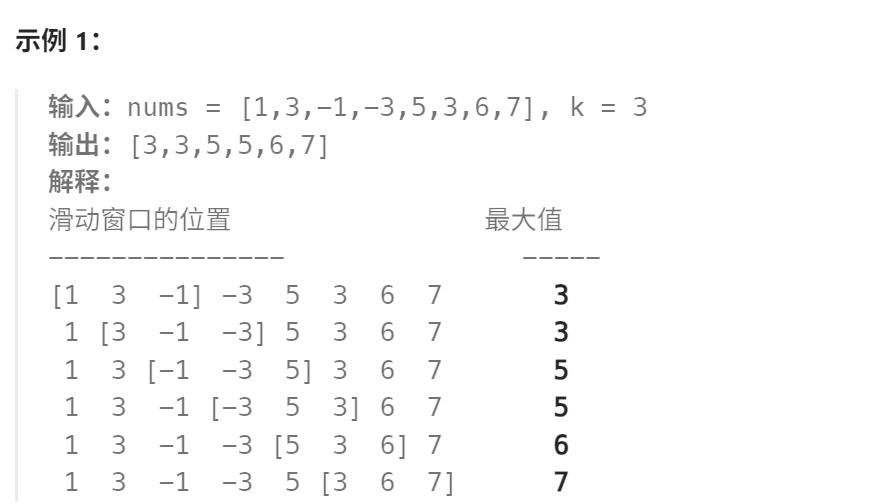


核心思路：
维护一个单调递减的双端队列，队列中存的是数组下标，对应的值从队头到队尾递减。

队头始终保存当前窗口内的最大值下标

新元素进入窗口时，持续弹出队尾中所有比它小的元素（它们不可能再成为最大值）

窗口左端滑出时，若队头下标已不在窗口内，则弹出队头

当窗口形成（索引 ≥ k−1）后，队头元素即为当前窗口最大值

该方法保证每个元素最多进队一次、出队一次。


In [10]:
from collections import deque
from typing import List

class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:

        q = deque()   # 存下标，保持 nums[q] 单调递减
        res = []

        for i, x in enumerate(nums):
            # 1. 维护单调性：弹出所有比当前值小的元素
            while q and nums[q[-1]] <= x:
                q.pop()

            q.append(i)

            # 2. 移除窗口外的元素
            if q[0] <= i - k:
                q.popleft()

            # 3. 窗口形成后，记录最大值
            if i >= k - 1:
                res.append(nums[q[0]])

        return res

nums = [1,3,-1,-3,5,3,6,7]
k = 3
s = Solution()
print(s.maxSlidingWindow(nums, k))

[3, 3, 5, 5, 6, 7]


复杂度分析

时间复杂度：O(n)
每个元素最多入队一次、出队一次，整体为线性复杂度。

空间复杂度：O(k)
队列中最多存放 k 个元素的下标。

---

## 76. 最小覆盖子串

给定两个字符串 s 和 t，长度分别是 m 和 n，返回 s 中的 最短窗口 子串，使得该子串包含 t 中的每一个字符（包括重复字符）。如果没有这样的子串，返回空字符串 ""。

测试用例保证答案唯一。

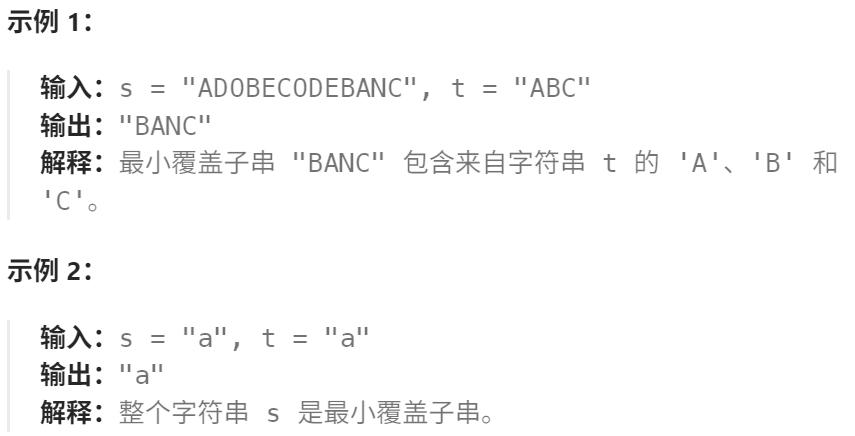

核心思路说明：
使用左右指针在字符串 s 上维护一个可变长度的窗口，用两个计数结构分别记录：
1）need：字符串 t 中每个字符所需的次数；
2）window：当前窗口中各字符出现的次数。

右指针不断右移以扩展窗口，当窗口已经覆盖了 t 的全部需求（即所有字符次数均满足）时，开始移动左指针收缩窗口，在保持覆盖条件成立的前提下不断缩短长度，并更新最短答案。

In [15]:
from collections import Counter

class Solution:
    def minWindow(self, s: str, t: str) -> str:
        if not s or not t:
            return ""

        need = Counter(t)
        window = {}
        valid = 0
        left = 0
        start = 0
        min_len = float('inf')

        for right, ch in enumerate(s):
            if ch in need:
                window[ch] = window.get(ch, 0) + 1
                if window[ch] == need[ch]:
                    valid += 1

            # 当窗口已经满足所有字符需求，开始收缩
            while valid == len(need):
                if right - left + 1 < min_len:
                    min_len = right - left + 1
                    start = left

                d = s[left]
                left += 1
                if d in need:
                    if window[d] == need[d]:
                        valid -= 1
                    window[d] -= 1

        return "" if min_len == float('inf') else s[start:start + min_len]
s = "ADOBECODEBANC"
t = "ABC"
print(Solution().minWindow(s, t))

BANC


复杂度分析

时间复杂度：O(m)
左右指针各自最多遍历字符串 s 一次，所有操作均为常数时间。

空间复杂度：O(n)
主要来自 need 和 window 两个计数哈希表，其大小与字符串 t 中不同字符数成正比。

---